# Домашнее задание №6
## Проверка стат. гипотез. Исследование влияния различных параметров выборки на _p-value_
### PROC TTEST

_[Гончаренко Дмитрий Александрович, Жуков Павел Николаевич, Слабоузова Анна Константиновна]_

### Задание

Чтобы лучше понять проблемы при использовании p-value, а также познакомиться с интересным примером ошибочных выводов, сделанных лишь на основе маленьких значений p-value, рекомендую прочитать [эту статью](https://www.nature.com/polopoly_fs/1.14700!/menu/main/topColumns/topLeftColumn/pdf/506150a.pdf). Кстати, не забудьте про _домашнее чтение_ - ссылка на слайдах.

В этом задании мы будем исследовать p-value для гипотезы о равенстве среднего выборки заданному числу: _**H0 = m**_. Для этого мы будем использовать процедуру `proc ttest;` в ее простейшем варианте.

Нужно провести симмуляцию выборок с различными характеристиками (т.е. сгенерировать выборки - выборки на каждой итерации симмуляции должны быть независимые) и проанализировать поведение p-value в различных ситуациях:
1. Как меняется p-value в зависимости от размера выборки **при соблюдении** предположений теста.
2. Как меняется p-value в зависимости от размера выборки **при нарушении** предположений теста.
3. Как ведет себя p-value в условиях **истинности H0**.  
4. Как ведет себя p-value когда **H0 не верна**.
5. Как ведет себя p-value **при соблюдении** предположений теста, когда **H0 не верна** в зависимости от размера выборки, когда выборки зависимые, т.е. увеличивая размер на 1, мы получаем еще одно наблюдение из той же последовательности сл. чисел. 

Игото: 5 симмуляции.

Результатом каждой симмуляции должен быть график _p-value в зависимости от кол-ва наблюдений_. Для каждой ситуации своя картика. Нужно (по возможности кратко) описать поведение p-value на картинках, соответствующих разным ситуациям.  


### 1. Генерация случайных чисел

В задании нужно провести симмуляцию. Здесь подразумевается, что мы просто используем генератор случайных чисел для того, чтобы создать случайную выборку заданного размера из заданного распределения.

Подробнее про генерацияю случайных чисел **нужно** прочитать [здесь](http://documentation.sas.com/?docsetId=lefunctionsref&docsetTarget=p026ygl6toz3tgn14lt4iu6cl5bb.htm&docsetVersion=9.4&locale=en) 

Нужно понимать:
- как использовать процедуру `call streaminit()` в data step для инициализации генератора случайных чисел.
- и ее параметр генерации seed. За что отвечает данный парметр? Как добиться построения одинаковых случайных последовательностей? Как добиться разных случайных последовательностей? Что такое воспроизводимое исследование?
- функция `rand()` в data step: ее параметры. 


### 2. Макрос для симмуляции

Нужно написать макрос, у которого есть параметры (_дополните список при необходимости_):
1. max_obs= - максимальное кол-во наблюдений в исследовании
2. dist= - распределение, из которого мы будем генерировать случайные числа. Два возможных значения: 'normal' и 'lognormal'.
3. mu= - среднее распределения в параметре dist=. 

Макрос должен:
1. Создать выборки (наборы данных) с кол-вом наблюдений от 2 до max_obs с единственной переменной value - случайные числа из распределения в параметре dist= и средним в параметре mu=.
2. На каждой построенной выборке запустить процедуру ttest для проверки гипотезы H0=0. 
3. Для каждой выборки сохранить соответсвующие кол-во степеней свободы - DF ( т.е. размер выборки - 1) и полученное значение p-value (все это выводится в результатах работы proc ttest) в набор данных. Этот набор будет содержать столько наблюдений, сколько выборок мы сгенерируем. 
4. По полученному набору построить требуемый график.



#### 2.1. Управление выводом процедуры, сохранение вывода в набор данных
Т.к. proc ttest при каждом запуске выводит минимум три таблицы (кстати, для любой процедуры SAS вы можете посмотреть на список выводимых таблиц в разделе документации "ODS Table Names". Вот [для ttest](http://go.documentation.sas.com/?docsetId=statug&docsetTarget=statug_ttest_details21.htm&docsetVersion=14.2&locale=en)),то с учетом того, что нам придется построить, например, 500 выборок, вывод процедуры (HTML5 в SAS Studio) будет очень большим. Нужно как-то его сохратить или отключить полностью. [В статье](https://blogs.sas.com/content/iml/2015/05/26/suppress-ods.html) рассказывается про различные методы управления выводом. Нам подойдет вариант с полным отключением вывода перед процедурой `ods exclude all;` с сохранением лишь нужной таблицы `ods output TTests=TTests ;`.

Также для ускорения работы можно отключить построение графиков в `proc ttest` - опция `plot=`.

#### 2.2. Объединение наборов данных
Все наборы, которые получатся при каждом запуске ttest, нужно объединить в один -  тут поможет `proc append`. Обратите внимание, что перед запуском нужно удалить общий набор - иначе наблюдения от разных симмуляций будут вместе - нам это не подходит.

#### 2.3. Построение графиков
Для построения графиков можно использовать proc sgplot например так:

`
proc sgplot data=alltests /* если здесь данные по всем тестам */;
    series x=DF y=probt;
    refline 0.1 0.05 0.01 / axis=y lineattrs=(color=red);
    reg x=DF  y=probt / lineattrs=(color=white);
run;
`

Посмотреть на возможности процедуры можно [тут](https://support.sas.com/sassamples/graphgallery/PROC_SGPLOT.html).


In [1]:
%macro GenerateSamples(max_obs=, dist=, mu=, seed=, samples_are_independ=1);

%do sample_len=2 %to &max_obs;
    data Sample&sample_len;
        call streaminit(&seed);
        %do i = 1 %to &sample_len;
            val = rand(&dist, &mu);
            output;
        %end;
    run;

    %if &samples_are_independ ne 0 %then 
            %let seed = %eval(&seed+1); 

    ods exclude all;
    ods output ttests=one_sample_ttests;
    proc ttest h0=0 data=Sample&sample_len plots=none; run;
    ods exclude none;
    
    %if &sample_len eq 2 %then %do;
            data all_ttests;
            set one_sample_ttests(keep=DF Probt);
            run;
        %end;
    %else %do;
            proc append base=all_ttests 
                        data=one_sample_ttests(keep=DF Probt) force; run;
        %end;        
%end;

proc sgplot data=all_ttests /* здесь данные по всем тестам */;
    series x=DF y=probt;
    refline 0.1 0.05 0.01 / axis=y lineattrs=(color=red);
    reg x=DF  y=probt / lineattrs=(color=green);
run;

%mend;

SAS Connection established. Subprocess id is 29896




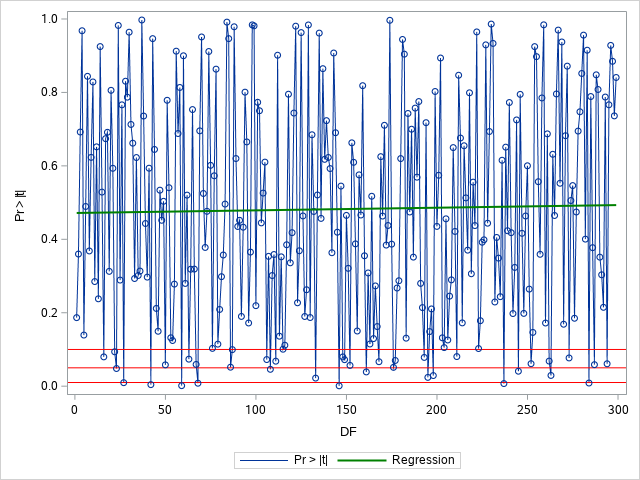

In [2]:
/* случай 1: предположения теста соблюдены, 
 * то есть распределение каждого элемента в выборке нормальное и независимое,
 * выборки независимы друг от друга. Гипотеза H0 верна
 */
%GenerateSamples(max_obs=300, dist='normal', mu=0, seed=100);

#### _Ваш_ вывод по результатам симмуляции 1
Видно, что в среднем значения p-value значительно превосходят пороги 0.1, 0.05 и 0.01. Это значит, что скорее всего, гипотеза не будет отвергнута. И согласно графику лучше иметь несколько независимых выборок для уточнения результата.


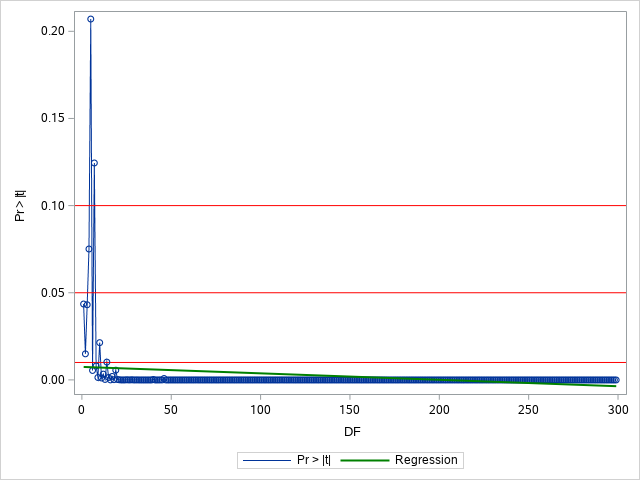

In [3]:
/* случай 2: предположения теста не соблюдены, 
 * а именно распределение каждого элемента в выборке логарифмически
 * нормальное. Гипотеза H0 верна 
 */
%GenerateSamples(max_obs=300, dist='lognormal', mu=0, seed=100);

#### _Ваш_ вывод по результатам симмуляции 2
Если не знать, что тест невалиден, то гипотеза H0 будет отвергнута. Что приведет к ошибке. Соответственно, нужно следить за проведением тестов и осознавать, что проблема может быть в начальных предположениях.


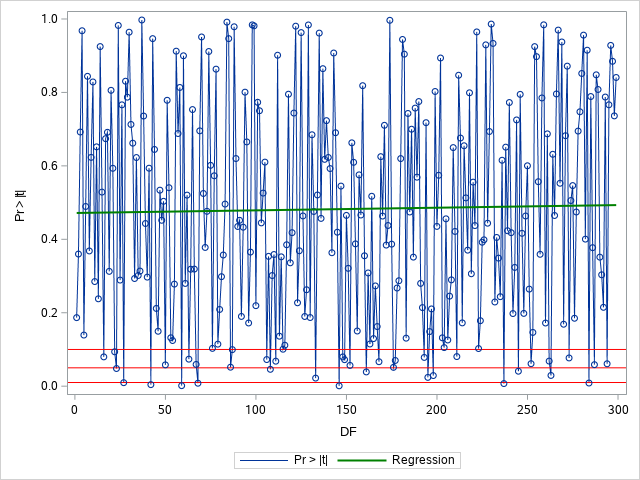

In [4]:
/* случай 3: предположения теста соблюдены,
 * гипотеза H0 верна 
 */
%GenerateSamples(max_obs=300, dist='normal', mu=0, seed=100);

#### _Ваш_ вывод по результатам симмуляции 3
Желательно провести несколько тестов, чтобы убедиться, в среднем p-value больше нужного порога ( 0.1, 0.05 или 0.01)


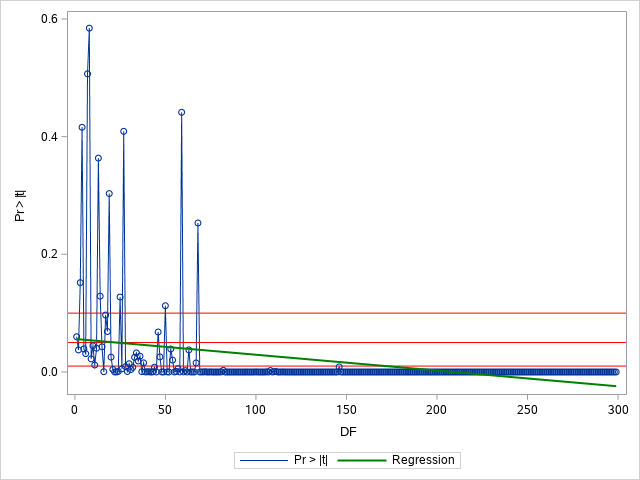

In [5]:
/* случай 4: предположения теста соблюдены,
 * гипотеза H0 неверна
 */
%GenerateSamples(max_obs=300, dist='normal', mu=0.5, seed=100);

#### _Ваш_ вывод по результатам симмуляции 4
При достаточно большой выборке гипотеза будет отвергнута.


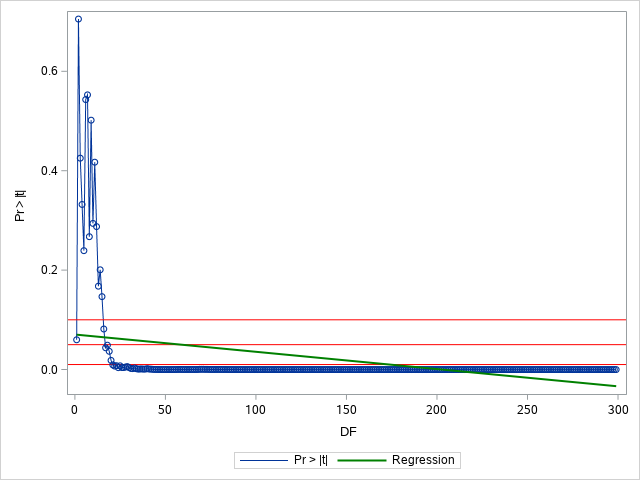

In [6]:
/* случай 5: предположения теста соблюдены, 
 * гипотеза H0 неверна,
 * выборки зависимы
 */
%GenerateSamples(max_obs=300, dist='normal', mu=0.5, seed=100, samples_are_independ=0);

#### _Ваш_ вывод по результатам симмуляции 5
Гипотеза будет отвергнута, причем при разных seed графики все равно быстро сходятся. Это значит, если гипотеза неверна, достаточно взять одну достаточно большую выборку. Но по выводам из симуляций 1 и 3, помним, что все-таки лучше взять несколько независимых выборок для уточнения результата.